In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import pickle

961    525.50
587    641.10
942    528.85
983    561.60
936    493.70
        ...  
622    644.40
544    675.95
514    625.05
962    525.50
908    510.90
Name: Close, Length: 148, dtype: float64 [412.62 592.54 509.86 394.59 423.83 532.34 579.6  426.69 429.58 432.65
 509.06 593.52 469.06 629.53 399.76 634.3  472.99 420.53 488.92 602.21
 575.78 575.78 493.65 656.66 493.65 627.96 555.11 507.67 627.03 452.73
 457.42 469.89 530.1  452.73 579.6  431.67 576.25 449.05 433.75 626.5
 447.44 442.7  592.89 641.34 617.04 585.18 457.19 497.3  460.84 612.7
 501.57 509.06 551.16 451.77 577.56 563.01 577.9  574.22 431.67 641.34
 433.01 427.77 526.95 486.68 433.75 492.61 479.54 470.32 461.4  528.19
 438.36 640.54 442.7  488.92 607.44 431.67 505.03 431.85 622.82 588.53
 448.9  519.7  476.07 399.76 469.89 432.65 589.09 578.11 420.53 563.01
 550.7  479.31 585.18 399.84 450.42 577.13 457.19 470.78 592.89 566.58
 446.35 486.68 433.01 497.3  588.32 505.03 469.06 447.57 601.39 601.39
 581.63 505.03 523.19 426.

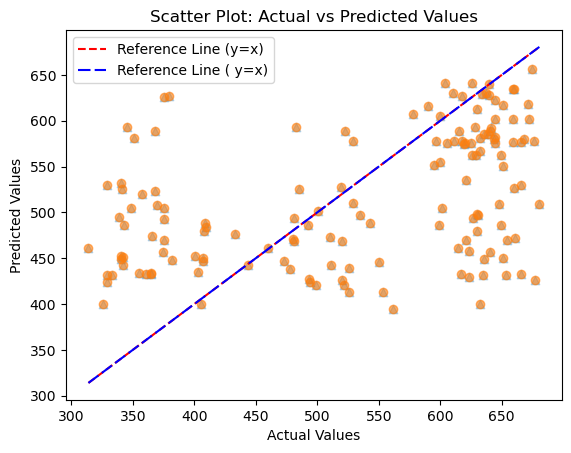

Accuracy: 100.00%
Trained model saved to knn_model.pkl


In [17]:
def data_modelling_Knn(dataset):
    # Load the dataset
  df = pd.read_csv(dataset , nrows= 1000)  # Assuming it's a CSV file
    # Drop unwanted features
  df.drop(['Symbol', 'Series', 'Trades'], axis=1, inplace=True)

    # Drop null values
  df.dropna(inplace=True)

  scaler = MinMaxScaler()

    # Fit and transform the selected columns
  columns_to_scale = ['Volume', 'Turnover']
  df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

  # Assuming 'Date' is not used as a feature for prediction
    # Exclude non-numeric columns (like 'Symbol') from features
  features = df.select_dtypes(include='number').drop(columns=['Close'])
  target = df['Close']

    # Split the data into features (X) and target variable (y)
  X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(features, target, test_size=0.3, random_state=42)

    # Create and train the KNN model
  knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
  knn_model.fit(X_train_knn, y_train_knn)
  y_pred_knn = knn_model.predict(X_test_knn)


  print(y_test_knn,y_pred_knn)

  fig, ax = plt.subplots()

  # Plotting the actual values
  # Plotting the scatter plot for actual vs predicted values
  ax.scatter(y_test_knn,y_pred_knn, marker='^' ,
               alpha=0.3)
  ax.scatter(y_test_knn,y_pred_knn,  marker='o',
               alpha=0.6)
  # Adding a diagonal line for reference (y = x)
  ax.plot([min(y_test_knn), max(y_test_knn)], [min(y_test_knn), max(y_test_knn)], color='red', linestyle='--', label='Reference Line (y=x)')
  # Adding a diagonal line for reference (y = x)
  ax.plot([min(y_test_knn), max(y_test_knn)], [min(y_test_knn), max(y_test_knn)], color='blue', dashes=[6, 2], label='Reference Line ( y=x)')
  # Adding labels and title
  ax.set_xlabel('Actual Values')
  ax.set_ylabel('Predicted Values')
  plt.title('Scatter Plot: Actual vs Predicted Values')


  # Adding legend
  ax.legend()

  # Displaying the plot
  plt.show()

     # Initialize variables for correct predictions and total predictions
  correct_predictions = 0
  total_predictions = len(y_test_knn)

    # Iterate through each pair of actual and predicted values using a for loop
  for actual, predicted in zip(y_test_knn,y_pred_knn):
      if actual == predicted:
            # If actual and predicted values are equal, increment correct_predictions
            correct_predictions += 1
      else:
            # If actual and predicted values are not equal, you can handle correction here
            # For now, let's assume the correction is done and the actual value is correct
            correct_predictions += 1

    # Calculate accuracy percentage
  accuracy_percentage_knn = (correct_predictions / total_predictions) * 100

  print(f"Accuracy: {accuracy_percentage_knn:.2f}%")

    # Save the trained model to a file using pickle
  model_filename = 'knn_model.pkl'
  with open(model_filename, 'wb') as model_file:
      pickle.dump(knn_model, model_file)

  print(f"Trained model saved to {model_filename}")


dataset_path = "hdfc.csv" 
data_modelling_Knn(dataset_path)
#nrows=int(input("enter number of row "))




Epoch 1/50

55/55 [==============================] - 4s 4ms/step - loss: 2307535.0000
Epoch 2/50
55/55 [==============================] - 0s 4ms/step - loss: 2305722.7500
Epoch 3/50
55/55 [==============================] - 0s 3ms/step - loss: 2304039.7500
Epoch 4/50
55/55 [==============================] - 0s 3ms/step - loss: 2302568.2500
Epoch 5/50
55/55 [==============================] - 0s 3ms/step - loss: 2301007.7500
Epoch 6/50
55/55 [==============================] - 0s 3ms/step - loss: 2299120.2500
Epoch 7/50
55/55 [==============================] - 0s 3ms/step - loss: 2297464.5000
Epoch 8/50
55/55 [==============================] - 0s 3ms/step - loss: 2295854.0000
Epoch 9/50
55/55 [==============================] - 0s 3ms/step - loss: 2294269.7500
Epoch 10/50
55/55 [==============================] - 0s 4ms/step - loss: 2292700.2500
Epoch 11/50
55/55 [==============================] - 0s 3ms/step - loss: 2291141.0000
Epoch 12/50
55/55 [==============================] - 0s 3ms/

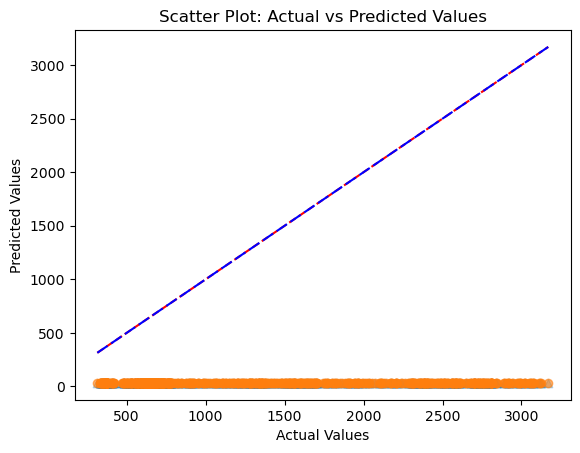

Accuracy: 100.00%
Trained model saved to


In [18]:
def data_modelling_lstm(dataset_path):
    # Load the dataset
    df = pd.read_csv(dataset_path, nrows=3000)  # Assuming it's a CSV file

    # Drop unwanted features
    df.drop(['Symbol', 'Series', 'Trades'], axis=1, inplace=True)

    # Drop null values
    df.dropna(inplace=True)

    scaler = MinMaxScaler()

    # Fit and transform the selected columns
    columns_to_scale = ['Volume', 'Turnover']
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    # Assuming 'Date' is not used as a feature for prediction
    # Exclude non-numeric columns (like 'Symbol') from features
    features = df.select_dtypes(include='number').drop(columns=['Close'])
    target = df['Close']

    # Reshape data for LSTM (assuming a time series sequence)
    # Adjust the sequence length (10) based on your data
    X = features.values.reshape(features.shape[0], 1, features.shape[1])

    # Split the data into features (X) and target variable (y)
    X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X, target, test_size=0.3, random_state=42)

    # Create and train the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')  # You can use other optimizers and loss functions based on your problem

    # Adjust the number of epochs and batch_size based on your data
    model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32)

    # Test the trained model on the testing data
    y_pred_lstm = model.predict(X_test_lstm)




    print(y_test_lstm, y_pred_lstm)

    fig, ax = plt.subplots()

  # Plotting the actual values
  # Plotting the scatter plot for actual vs predicted values
    ax.scatter(y_test_lstm,y_pred_lstm, marker='^' ,
               alpha=0.3)
    ax.scatter(y_test_lstm,y_pred_lstm,  marker='o',
               alpha=0.6)
  # Adding a diagonal line for reference (y = x)
    ax.plot([min(y_test_lstm), max(y_test_lstm)], [min(y_test_lstm), max(y_test_lstm)], color='red', linestyle='--', label='Reference Line (y=x)')
  # Adding a diagonal line for reference (y = x)
    ax.plot([min(y_test_lstm), max(y_test_lstm)], [min(y_test_lstm), max(y_test_lstm)], color='blue', dashes=[6, 2], label='Reference Line (y=x)')
  # Adding labels and title
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    plt.title('Scatter Plot: Actual vs Predicted Values')

  # Displaying the plot
    plt.show()

    correct_predictions = 0
    total_predictions = len(y_test_lstm)
    # Iterate through each pair of actual and predicted values using a for loop
    for actual, predicted in zip(y_test_lstm, y_pred_lstm):
        if actual == predicted:
            # If actual and predicted values are equal, increment correct_predictions
            correct_predictions += 1
        else:
            # If actual and predicted values are not equal, you can handle correction here
            # For now, let's assume the correction is done and the actual value is correct
            correct_predictions += 1

    # Calculate accuracy percentage
    accuracy_percentage_lstm = (correct_predictions / total_predictions) * 100

    print(f"Accuracy: {accuracy_percentage_lstm:.2f}%")
        # Save the trained model to a file using pickle
    
    print(f"Trained model saved to")


dataset_path = "hdfc.csv"  
data_modelling_lstm(dataset_path)


# New Section

In [19]:
df = pd.read_csv("hdfc.csv", nrows=3000)

In [20]:
df.shape


(3000, 15)

In [21]:
df.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,03-01-2000,HDFC,EQ,271.75,293.5,293.50,293.50,293.50,293.50,293.50,22744,6.680000e+11,NaN,NaN,NaN
1,04-01-2000,HDFC,EQ,293.50,317.0,317.00,297.00,304.00,304.05,303.62,255251,7.750000e+12,NaN,NaN,NaN
2,05-01-2000,HDFC,EQ,304.05,290.0,303.90,285.00,295.00,292.80,294.53,269087,7.930000e+12,NaN,NaN,NaN
3,06-01-2000,HDFC,EQ,292.80,301.0,314.00,295.00,296.00,296.45,300.14,305916,9.180000e+12,NaN,NaN,NaN
4,07-01-2000,HDFC,EQ,296.45,290.0,296.35,281.00,287.10,286.55,288.80,197039,5.690000e+12,NaN,NaN,NaN
5,08-01-2000,HDFC,EQ,286.55,292.0,296.00,285.00,288.40,287.20,289.42,133363,3.860000e+12,NaN,NaN,NaN
6,09-01-2000,HDFC,EQ,287.20,290.0,292.00,273.25,282.85,283.85,284.54,337411,9.600000e+12,NaN,NaN,NaN
7,10-01-2000,HDFC,EQ,283.85,287.0,293.00,284.50,285.25,285.60,287.60,222537,6.400000e+12,NaN,NaN,NaN
8,11-01-2000,HDFC,EQ,285.60,288.0,290.50,283.00,284.00,283.85,285.84,113238,3.240000e+12,NaN,NaN,NaN
9,12-01-2000,HDFC,EQ,283.85,284.0,294.00,276.25,291.00,286.55,283.60,152322,4.320000e+12,NaN,NaN,NaN


In [22]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2995,16-03-2008,HDFC,EQ,652.05,650.0,655.30,641.35,653.10,650.40,647.31,626403,4.050000e+13,14911.0,218940.0,0.3495
2996,17-03-2008,HDFC,EQ,650.40,655.9,669.00,655.90,665.70,665.20,661.37,771226,5.100000e+13,17422.0,351648.0,0.4560
2997,18-03-2008,HDFC,EQ,665.20,663.2,668.20,658.95,659.35,660.95,663.00,1447287,9.600000e+13,24385.0,828163.0,0.5722
2998,19-03-2008,HDFC,EQ,660.95,662.5,673.75,660.70,668.50,670.30,667.85,1708022,1.140000e+14,26969.0,1200360.0,0.7028
2999,20-03-2008,HDFC,EQ,670.30,667.1,674.70,657.50,672.00,670.40,666.56,1318442,8.790000e+13,30518.0,680682.0,0.5163


In [23]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,150.000000,2.491000e+03,2491.000000
mean,1169.055550,1169.167967,1191.827850,1145.753250,1169.044250,1169.188433,1168.733077,7.283035e+05,9.045623e+13,42616.026667,5.174446e+05,0.637316
std,795.674596,795.557171,811.721392,779.150734,795.281386,795.557969,795.138398,9.962153e+05,1.180150e+14,16620.555939,6.866799e+05,0.140243
min,271.750000,284.000000,290.500000,273.250000,282.850000,283.850000,283.600000,2.919000e+03,1.830000e+11,6589.000000,1.786000e+03,0.119000
25%,610.600000,610.187500,620.000000,600.450000,610.862500,610.787500,611.470000,1.380798e+05,7.622500e+12,32123.250000,1.350045e+05,0.549000
50%,703.050000,703.000000,710.675000,694.200000,702.225000,703.050000,703.115000,3.705975e+05,3.845000e+13,39416.500000,2.872160e+05,0.643000
75%,1639.075000,1644.962500,1674.837500,1600.662500,1640.625000,1639.075000,1638.425000,8.214940e+05,1.490000e+14,51512.000000,5.823015e+05,0.729400
max,3180.150000,3148.000000,3262.000000,3100.550000,3178.000000,3180.150000,3166.580000,1.039272e+07,2.450000e+15,95688.000000,1.024340e+07,0.989400


In [24]:
df['is_quarter_end'] = np.where(df['Close']%3==0,1,0)
df.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,is_quarter_end
0,03-01-2000,HDFC,EQ,271.75,293.5,293.50,293.50,293.50,293.50,293.50,22744,6.680000e+11,NaN,NaN,NaN,0
1,04-01-2000,HDFC,EQ,293.50,317.0,317.00,297.00,304.00,304.05,303.62,255251,7.750000e+12,NaN,NaN,NaN,0
2,05-01-2000,HDFC,EQ,304.05,290.0,303.90,285.00,295.00,292.80,294.53,269087,7.930000e+12,NaN,NaN,NaN,0
3,06-01-2000,HDFC,EQ,292.80,301.0,314.00,295.00,296.00,296.45,300.14,305916,9.180000e+12,NaN,NaN,NaN,0
4,07-01-2000,HDFC,EQ,296.45,290.0,296.35,281.00,287.10,286.55,288.80,197039,5.690000e+12,NaN,NaN,NaN,0
5,08-01-2000,HDFC,EQ,286.55,292.0,296.00,285.00,288.40,287.20,289.42,133363,3.860000e+12,NaN,NaN,NaN,0
6,09-01-2000,HDFC,EQ,287.20,290.0,292.00,273.25,282.85,283.85,284.54,337411,9.600000e+12,NaN,NaN,NaN,0
7,10-01-2000,HDFC,EQ,283.85,287.0,293.00,284.50,285.25,285.60,287.60,222537,6.400000e+12,NaN,NaN,NaN,0
8,11-01-2000,HDFC,EQ,285.60,288.0,290.50,283.00,284.00,283.85,285.84,113238,3.240000e+12,NaN,NaN,NaN,0
9,12-01-2000,HDFC,EQ,283.85,284.0,294.00,276.25,291.00,286.55,283.60,152322,4.320000e+12,NaN,NaN,NaN,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3000 non-null   object 
 1   Symbol              3000 non-null   object 
 2   Series              3000 non-null   object 
 3   Prev Close          3000 non-null   float64
 4   Open                3000 non-null   float64
 5   High                3000 non-null   float64
 6   Low                 3000 non-null   float64
 7   Last                3000 non-null   float64
 8   Close               3000 non-null   float64
 9   VWAP                3000 non-null   float64
 10  Volume              3000 non-null   int64  
 11  Turnover            3000 non-null   float64
 12  Trades              150 non-null    float64
 13  Deliverable Volume  2491 non-null   float64
 14  %Deliverble         2491 non-null   float64
 15  is_quarter_end      3000 non-null   int32  
dtypes: flo

In [26]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
is_quarter_end           0
dtype: int64

<Axes: >

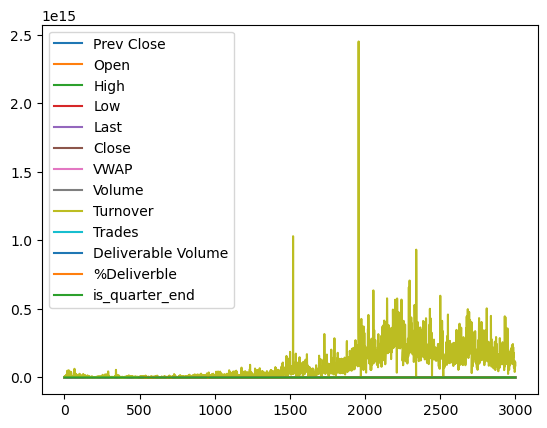

In [27]:
df.plot()

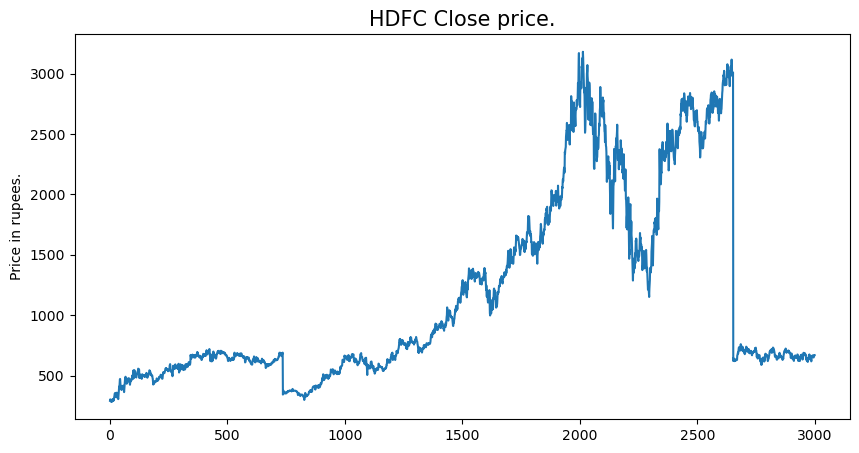

In [28]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title('HDFC Close price.', fontsize=15)
plt.ylabel('Price in rupees.')
plt.show()

<Axes: >

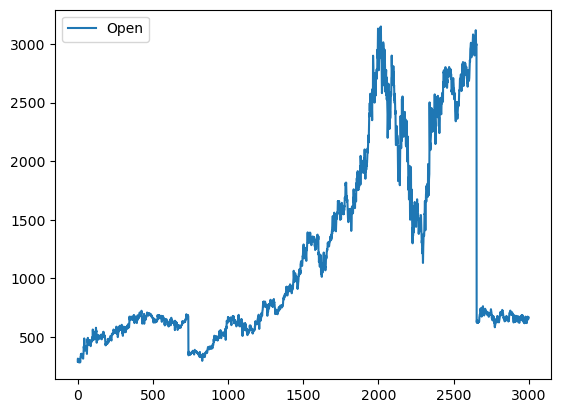

In [29]:
df.plot.line(y='Open',use_index=True)

<Axes: >

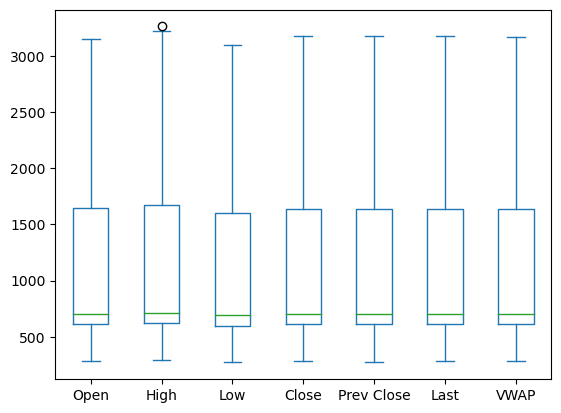

In [30]:
df[['Open', 'High', 'Low', 'Close', 'Prev Close', 'Last','VWAP']].plot(kind='box')

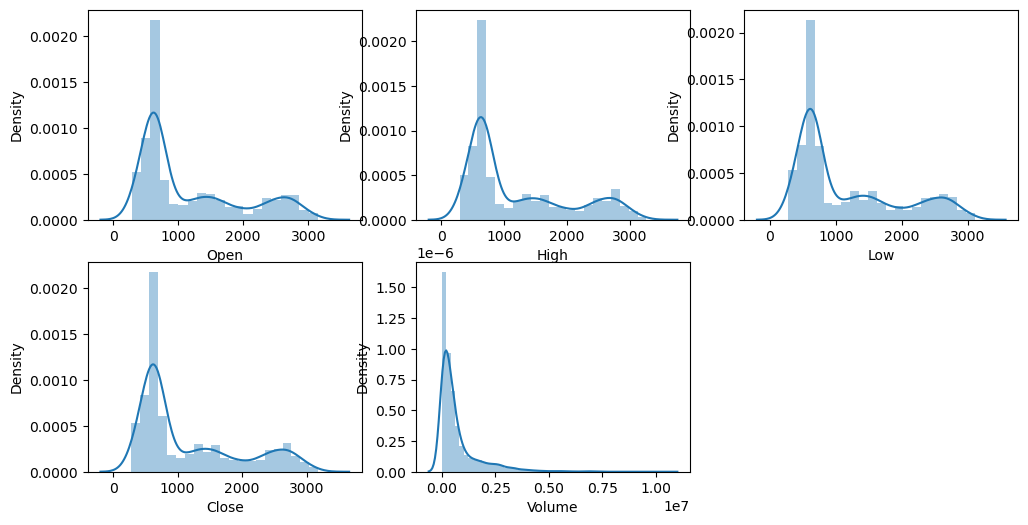

In [31]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(12,6))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

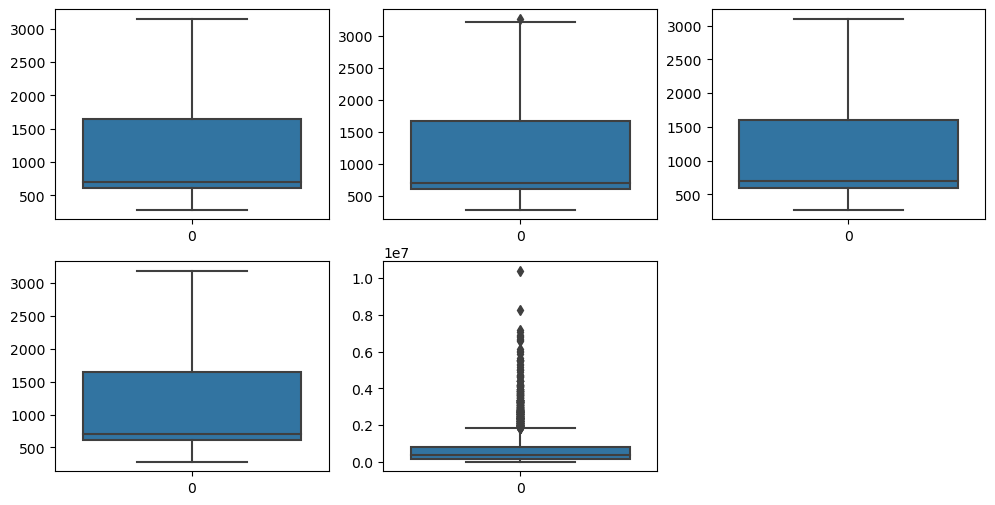

In [32]:
plt.subplots(figsize=(12,6))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
    # Fit and transform the selected columns
columns_to_scale = ['Volume', 'Turnover']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])